# Visualization of ready sentiment score from cryptonews.com

# Sentiment Analysis using Crypto News

In [1]:
import sys
print(sys.executable)

C:\Users\lavin\anaconda3\envs\PythonData\python.exe


In [2]:
# import libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import pymongo
from pymongo import MongoClient
import certifi
from mongo2_config import mongo_uri
from wordcloud import WordCloud, STOPWORDS
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
plt.style.use('fivethirtyeight')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk


In [3]:
# create a dataframe from the csv
path ="C:/UC_Berkeley\Analysis_Projects_Class_Folder/Module20_Final_Project/Cryptocurrency-Analysis/Database/Seg2_LJ/Top_Senti.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,Symbol,Date,Neutral,Positive,Negative,sentiment_score
0,0,BTC,2022-02-01,26,49,29,0.288
1,1,BTC,2022-01-31,26,36,29,0.115
2,2,BTC,2022-01-30,23,20,15,0.129
3,3,BTC,2022-01-29,25,11,10,0.033
4,4,BTC,2022-01-28,42,25,31,-0.092
...,...,...,...,...,...,...,...
15017,15017,DOGE,2020-12-15,1,0,0,0.000
15018,15018,DOGE,2020-12-13,1,0,0,0.000
15019,15019,DOGE,2020-12-09,1,0,0,0.000
15020,15020,DOGE,2020-12-08,1,0,0,0.000


In [4]:
# checking for mull values
df.isnull().sum().sum()
df.isna().sum()

Unnamed: 0         0
Symbol             0
Date               0
Neutral            0
Positive           0
Negative           0
sentiment_score    0
dtype: int64

In [5]:
print(df.dtypes)

Unnamed: 0           int64
Symbol              object
Date                object
Neutral              int64
Positive             int64
Negative             int64
sentiment_score    float64
dtype: object


In [6]:
# df['text'] = df['text'].astype('str')
# df['title'] = df['title'].astype('str')
# print(df.dtypes)

In [8]:
# #Create function to get the polarity
# def getPolarity(text):
#     return TextBlob(text).sentiment.polarity

# #Create one new column called 'Polarity'
# df['Polarity'] = df['title'].apply(getPolarity)

# # show df with new column
# df.head(5)

In [9]:
# # Create a function to compute negative, neutral and positive sentiments
# def getSentiment(score):
#     if score < 0:
#         return 'Negative'
#     elif score == 0:
#         return 'Neutral'
#     else:
#         return 'Positive'
    
# # Create a new column to store the sentiment
# df['Sentiment'] = df['Polarity'].apply(getSentiment)

# #show the df
# df

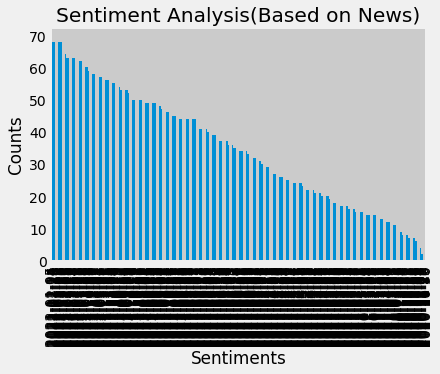

In [11]:
# Plot and visualize sentiment count
plt.title('Sentiment Analysis(Based on News)')
df["Date"].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

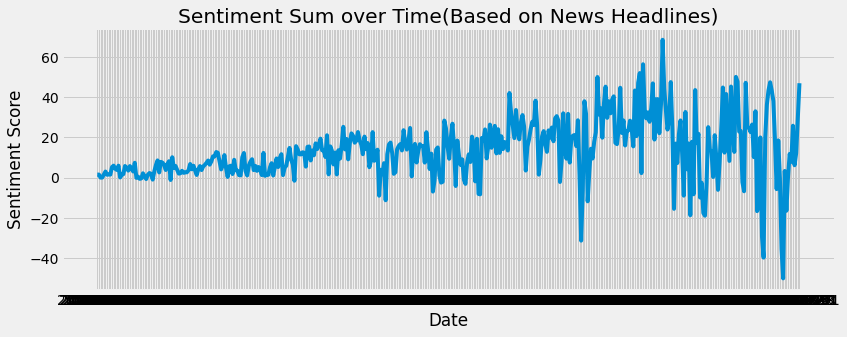

In [15]:
# Plot the sum of the polrity for each year
plt.figure(figsize=(12.33, 4.5))
plt.title('Sentiment Sum over Time(Based on News Headlines)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
sentiment = df.groupby(['Date']).sum()['sentiment_score'] 
plt.plot(sentiment.index, sentiment)

In [13]:
# show the sum of the polarity for each year
polarity

year
2013     22.947175
2014    245.015726
2015    141.357692
2016    249.616311
2017    360.032574
2018    366.714197
Name: Polarity, dtype: float64

In [14]:
# Get the count of each article per entry
sentiment_score_count = df.groupby(['Date']).count()['sentiment_score']
sentiment_score_count

Date
2020-10-30     1
2020-11-13     1
2020-11-20     1
2020-11-27     1
2020-12-01     2
              ..
2022-01-28    68
2022-01-29    44
2022-01-30    49
2022-01-31    62
2022-02-01    63
Name: sentiment_score, Length: 432, dtype: int64

In [17]:
# Show the average sentiment for each year
sentiment_score_avg = sentiment / sentiment_score_count
sentiment_score_avg

Date
2020-10-30    1.500000
2020-11-13    1.500000
2020-11-20    0.000000
2020-11-27    0.000000
2020-12-01    0.750000
                ...   
2022-01-28    0.378456
2022-01-29    0.139568
2022-01-30    0.248408
2022-01-31    0.476419
2022-02-01    0.743381
Name: sentiment_score, Length: 432, dtype: float64

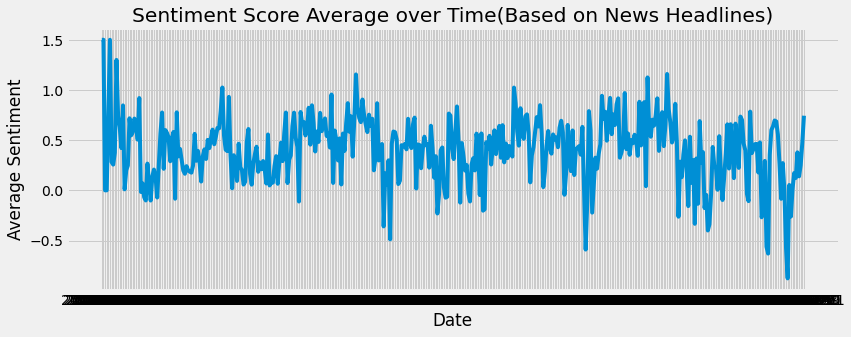

In [18]:
# Plot the average sentiment over time
plt.figure(figsize=(12.33, 4.5))
plt.title('Sentiment Score Average over Time(Based on News Headlines)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.plot(sentiment_score_avg.index, sentiment_score_avg)